In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import activations
from keras.optimizers import SGD
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as pyplot
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn

In [3]:
  #Mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

In [4]:

# Location of Zip File
drive_path = '/content/drive/MyDrive/RD_BinaryClass.zip'
local_path = '/content'
!cp '{drive_path}' .
os.chdir(local_path)
!unzip -q 'RD_BinaryClass.zip'

In [5]:
data = []
labels = []
img_height = 200
img_width = 200
import glob
rd = glob.glob('/content/RD/*.*')
non_rd = glob.glob('/content/Non-RD/*.*')

for i in rd:
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb',
    target_size= (img_height,img_width))
    image=np.array(image)
    data.append(image)
    labels.append(0)

for i in non_rd:
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb',
    target_size= (img_height,img_width))
    image=np.array(image)
    data.append(image)
    labels.append(1)

data = np.array(data)
labels = np.array(labels)

from sklearn.model_selection import train_test_split
trainX, testX, trainy, testy = train_test_split(data, labels, test_size=0.2,
                                                random_state=42)

In [6]:
trainX = trainX.astype("float32") / 255.0
testX = testX.astype("float32") / 255.0

In [7]:
def plot_accuracy(history, miny=None):
  pyplot.plot(history.history['acc'])
  pyplot.plot(history.history['val_acc'])
  pyplot.title('model accuracy')
  pyplot.ylabel('accuracy')
  pyplot.xlabel('epoch')
  pyplot.legend(['train', 'val'], loc='upper left')
  pyplot.show()

In [8]:
def plot_conf(model, testX, testy):
  y_pred = model.predict(testX)
  pred=np.argmax(y_pred, axis=1)
  con_mat = tf.math.confusion_matrix(labels=testy, predictions=pred).numpy()
  con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)
  classes = ["RD", "Non-RD"]
  con_mat_df = pd.DataFrame(con_mat_norm, index = classes, columns = classes)
  figure = pyplot.figure(figsize=(4, 4))
  sns.heatmap(con_mat_df, annot=True,cmap=pyplot.cm.Blues)
  pyplot.tight_layout()
  pyplot.ylabel('True label')
  pyplot.xlabel('Predicted label')
  pyplot.show()

In [9]:
def layer_plot(scores_acc, scores_loss):
  keys = list(scores_acc.keys())
  pyplot.plot(keys, [scores_acc[k][0] for k in keys], label = 'train', marker = '.')
  pyplot.plot(keys, [scores_acc[k][1] for k in keys], label = 'test', marker = '.')
  pyplot.legend()
  pyplot.ylabel('Accuracy')
  pyplot.xlabel('Number of Layers')
  pyplot.show()
  keys = list(scores_loss.keys())
  pyplot.plot(keys, [scores_loss[k][0] for k in keys], label = 'train', marker = '.')
  pyplot.plot(keys, [scores_loss[k][1] for k in keys], label = 'test', marker = '.')
  pyplot.legend()
  pyplot.ylabel('Loss')
  pyplot.xlabel('Number of Layers')
  pyplot.show()

In [10]:
def evaluate_model(model, trainX, trainy, testX, testy):
  train_loss, train_acc = model.evaluate(trainX, trainy, verbose=1)
  test_loss, test_acc = model.evaluate(testX, testy, verbose=1)
  print("Train Loss = %.3f Train Acc = %.3f Test Loss=%.3f' Test Acc = %.3f " % (train_loss, train_acc, test_loss, test_acc))
  scores_acc[len(model.layers)] = (train_acc, test_acc)
  scores_loss[len(model.layers)] = (train_loss, test_loss)

Base Model


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 194, 194, 64)        │           9,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 194, 194, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 194, 194, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 97, 97, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 602176)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 50)                  │      30,108,850 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             102 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,118,680 (114.89 MB)

 Trainable params: 30,118,552 (114.89 MB)

 Non-trainable params: 128 (512.00 B)

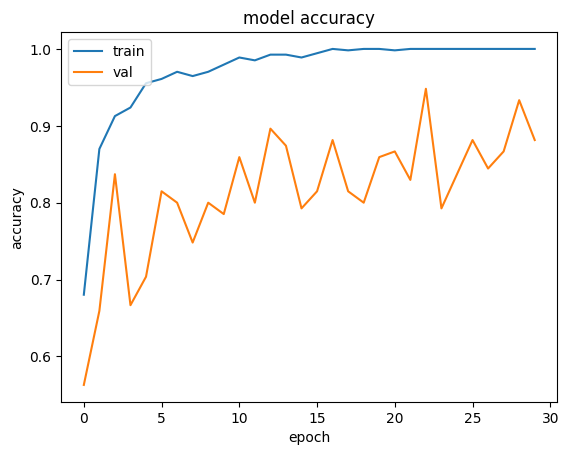

17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - acc: 0.9686 - loss: 0.4248
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.8767 - loss: 0.4630
Train Loss = 0.422 Train Acc = 0.968 Test Loss=0.465' Test Acc = 0.881 
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step


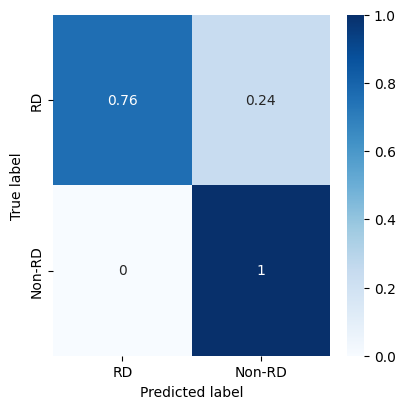

In [11]:
print("Base Model")
scores_acc = dict()
scores_loss = dict()
n_epochs = 30

model = models.Sequential()
model.add(layers.Conv2D(64, 7, input_shape=(img_height,img_width,3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Activation(activations.relu))
model.add(layers.MaxPooling2D())
model.add(layers.Flatten())
model.add(layers.Dense(50, activation='relu', kernel_initializer='he_uniform'))
model.add(layers.Dense(2, activation="softmax"))
model.compile(loss='sparse_categorical_crossentropy', optimizer=SGD(learning_rate=0.00021, momentum=0.9), metrics=['acc'])
model.summary()

history = model.fit(trainX, trainy, validation_data=(testX,testy), epochs=n_epochs, verbose=0, batch_size = 128)
plot_accuracy(history)
plot_conf(model,testX,testy)


In [12]:
evaluate_model(model,trainX,trainy,testX,testy)

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - acc: 0.9686 - loss: 0.4248
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - acc: 0.8767 - loss: 0.4630
Train Loss = 0.422 Train Acc = 0.968 Test Loss=0.465' Test Acc = 0.881 


# ***1: NON RD and 0: RD***

In [13]:
import tensorflow

In [14]:
tensorflow.keras.models.save_model(model, 'model.keras')
converter=tensorflow.lite.TFLiteConverter.from_keras_model(model=model)
model_tflite=converter.convert()
open('model.tflite','wb').write(model_tflite)


Saved artifact at '/tmp/tmpvqkjph92'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 200, 200, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 2), dtype=tf.float32, name=None)
Captures:
  135479918126432: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135477235227056: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135477233280704: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135477233284576: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135477233282992: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135477233282288: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135477233803584: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135477233807808: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135477233807280: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135477233805696: TensorSpec(shape=(), dtype=tf.resource, name=None)


120477580

In [15]:
import PIL

In [16]:
print("numpy",np.__version__)
print("tensorflow",tf.__version__)
print("pandas",pd.__version__)
print("keras",keras.__version__)
print("pillow",PIL.__version__)




numpy 1.26.4
tensorflow 2.17.0
pandas 2.1.4
keras 3.4.1
pillow 9.4.0


In [17]:
import sklearn


In [18]:
import pickle
import joblib
filename='model.pkl'
joblib.dump(model,filename)

['model.pkl']